1) Delivery_time -> Predict delivery time using sorting time

In [4]:
!pip install -U scikit-learn
!pip install statsmodels

In [5]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import seaborn as sns

In [6]:
ls

 Volume in drive C has no label.
 Volume Serial Number is D43E-8340

 Directory of C:\Users\HP PC\Desktop

28-04-2022  16:48    <DIR>          .
28-04-2022  16:48    <DIR>          ..
28-04-2022  16:41    <DIR>          .ipynb_checkpoints
16-01-2022  09:18            30,582 Afinn.csv
30-10-2021  07:28             2,092 Anaconda Navigator (anaconda3).lnk
27-11-2021  11:37            37,274 Anova and Chisquare.ipynb
16-01-2022  09:18            23,666 apple.txt
27-11-2021  11:45            45,073 Assignment.docx
16-01-2022  18:05           356,153 Basic Stats (1) Assignment.docx
09-03-2022  19:03         4,743,671 Book1 KPI.xlsx
21-11-2021  11:54         2,014,447 Chapter 1_ Descriptive Statistics and the Normal Distribution - Natural Resources Biometrics.pdf
21-11-2021  07:15         3,435,836 Chapter 3_ Hypothesis Testing - Natural Resources Biometrics.pdf
27-11-2021  11:52                 0 Chapter 5_ One-Way Analysis of Variance - Natural Resources Biometrics.pdf.zmdownload
28-11-202

In [10]:
dt = pd.read_csv("C:\\Users\\HP PC\\Documents\\EXCELR\\delivery_time.csv")
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [12]:
dt = pd.read_csv("C:\\Users\\HP PC\\Documents\\EXCELR\\delivery_time.csv")
print (dt.shape,"Shape of Data Frame")
print ("="*30)
print (dt.head(10))

(21, 2) Shape of Data Frame
   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10
5          15.35             6
6          19.00             7
7           9.50             3
8          17.90            10
9          18.75             9


In [13]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

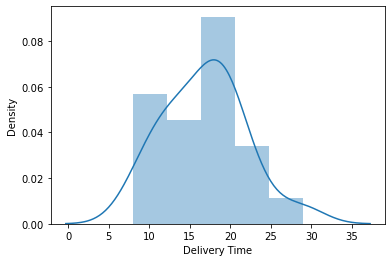

In [16]:
sns.distplot(dt['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

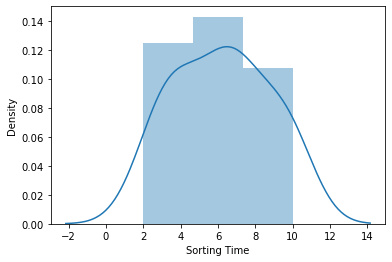

In [17]:
sns.distplot(dt['Sorting Time'])

In [18]:
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [19]:
dt.shape

(21, 2)

In [20]:
# Renaming Columns
dt=dt.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dt

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


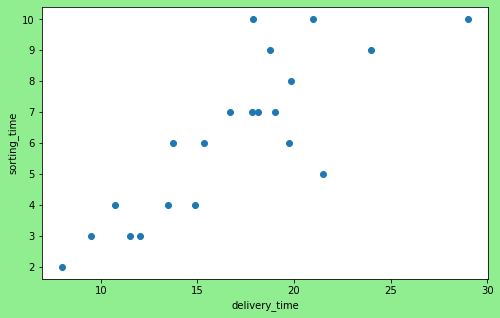

In [21]:
plt.figure(figsize=(8,5),facecolor="lightgreen")
plt.scatter(dt.delivery_time,dt.sorting_time,);
plt.xlabel("delivery_time");
plt.ylabel("sorting_time")
# print (dt.sorting_time)
plt.show()

In [22]:
# creating model with SKLEARN

In [23]:
dt

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [25]:
lm = LinearRegression()

X = dt["delivery_time"].values.reshape(-1,1)
Y = dt["sorting_time"].values.reshape(-1,1)

reg_sklearn = lm.fit(X,Y)

In [26]:
dt["delivery_time"]

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: delivery_time, dtype: float64

In [28]:
X

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [29]:
print (reg_sklearn.coef_)#alpha 
print (reg_sklearn.intercept_)#beta

[[0.41374363]]
[-0.75667337]


In [30]:
reg_sklearn.predict(X)

array([[ 7.93194282],
       [ 4.82886561],
       [ 7.41476329],
       [ 9.17317371],
       [11.24189185],
       [ 5.59429132],
       [ 7.10445557],
       [ 3.1738911 ],
       [ 6.64933758],
       [ 7.00101966],
       [ 7.44786278],
       [ 3.69107064],
       [ 6.14457035],
       [ 4.00137836],
       [ 4.22066248],
       [ 5.39983182],
       [ 4.93230152],
       [ 6.73622374],
       [ 2.55327566],
       [ 6.62037552],
       [ 8.13881464]])

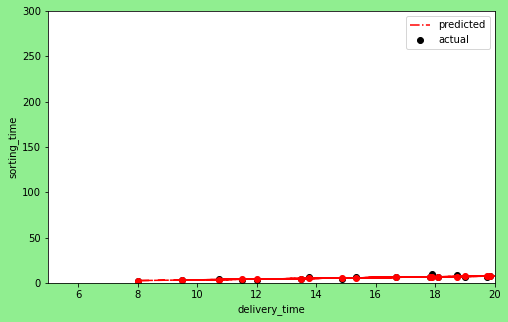

In [32]:
plt.figure(figsize=(8,5),facecolor="lightgreen")
plt.scatter(dt.delivery_time,(dt.sorting_time),color="black",label="actual");
plt.plot(dt.delivery_time,reg_sklearn.predict(X),label="predicted",color="red",linestyle="-.");
plt.scatter(dt.delivery_time,reg_sklearn.predict(X),color="red")
plt.xlabel("delivery_time");
plt.ylabel("sorting_time")
plt.xlim(5,20)
plt.ylim(0,+300)
# print (wcat.AT)
plt.legend(loc="best")
plt.show()

In [33]:
# Model Validation

In [34]:
pred_train_lm =reg_sklearn.predict(X)
r2_score(dt["sorting_time"],pred_train_lm)

0.682271474841723

In [35]:
# model with statsmodels

In [36]:
dt

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [37]:
first_model = smf.ols("sorting_time~delivery_time",data=dt).fit()
# pred_statsmodel = first_model.predict(wcat["Waist"])
# r2_score(wcat["AT"],pred_train_lm)

In [38]:
first_model.params


Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [39]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           3.98e-06
Time:                        16:58:22   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
delivery_time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

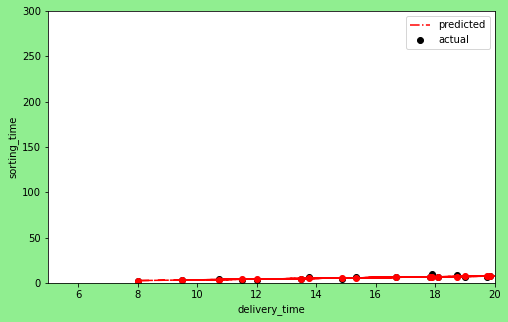

In [40]:
plt.figure(figsize=(8,5),facecolor="lightgreen")
plt.scatter(dt.delivery_time,(dt.sorting_time),color="black",label="actual");
plt.plot(dt.delivery_time,first_model.predict(dt["delivery_time"]),label="predicted",color="red",linestyle="-.");
plt.scatter(dt.delivery_time,first_model.predict(dt["delivery_time"]),color="red")
plt.xlabel("delivery_time");
plt.ylabel("sorting_time")
plt.xlim(5,20)
plt.ylim(0,+300)
# print (sorting_time)
plt.legend(loc="best")
plt.show()

In [41]:
model2 = smf.ols('sorting_time~np.log(delivery_time)',data=dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           1.59e-06
Time:                        16:58:53   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(delivery_time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model3 = smf.ols('np.log(sorting_time)~delivery_time',data=dt).fit()
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(sorting_time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Thu, 28 Apr 2022   Prob (F-statistic):           2.64e-06
Time:                          16:59:11   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
delivery_time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
dt["delivery_time_Sq"] = dt.delivery_time**2
model_quad = smf.ols("np.log(sorting_time)~delivery_time+delivery_time_Sq",data=dt).fit()
# model_quad.params
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(sorting_time)   R-squared:                       0.794
Model:                              OLS   Adj. R-squared:                  0.771
Method:                   Least Squares   F-statistic:                     34.62
Date:                  Thu, 28 Apr 2022   Prob (F-statistic):           6.77e-07
Time:                          16:59:25   Log-Likelihood:                 3.2337
No. Observations:                    21   AIC:                           -0.4673
Df Residuals:                        18   BIC:                             2.666
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7780      0.450     -1.730      0.101      -1.723       0.167
delivery_time        0.2272      0.052      4.346      0.000       0.117       0.337
delivery_time_Sq    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [45]:
# import dataset
dataset=pd.read_csv("C:\\Users\\HP PC\\Documents\\EXCELR\\delivery_time.csv")
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [46]:
# EDA and Data Visualization
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

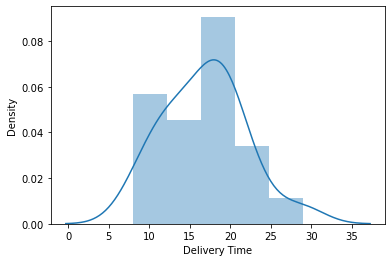

In [47]:
sns.distplot(dataset['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

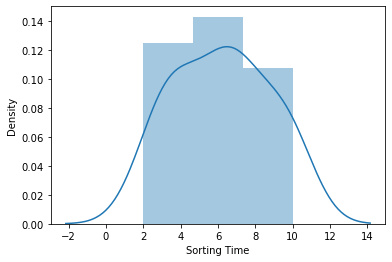

In [48]:
sns.distplot(dataset['Sorting Time'])

In [49]:
# Feature Engineering

In [50]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [51]:
# Correlation Analysis
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

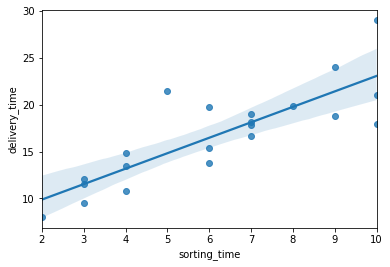

In [52]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

In [53]:
# Model Buiding
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [54]:
# Model testing
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [55]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [56]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [57]:
# Model Predictions

In [58]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [59]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [60]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [61]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

2) Salary_hike -> Build a prediction model for Salary_hike

In [62]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [63]:
# import dataset
dataset=pd.read_csv("C:\\Users\\HP PC\\Documents\\EXCELR\\Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [64]:
# EDA and DATA VISUALIZATION

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

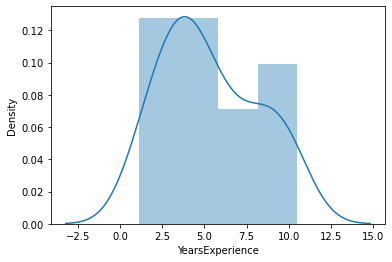

In [65]:
sns.distplot(dataset['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

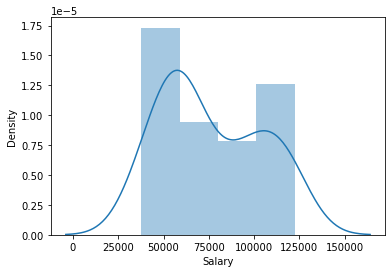

In [66]:
sns.distplot(dataset['Salary'])

In [67]:
#Correlation Analysis

dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

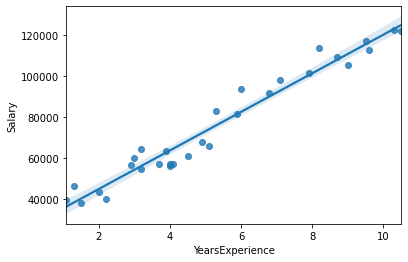

In [71]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

In [69]:
# Model building

model=smf.ols("Salary~YearsExperience",data=dataset).fit()

In [70]:
# Model testing

# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [72]:
# Finding Pvalues and tvalues

model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [73]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [74]:
# Model predictions

# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [75]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [76]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [77]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64